<a href="https://colab.research.google.com/github/csubhodeep/lyrics_overlay/blob/develop/notebooks/text_font/text_font_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text experiments for lyrics overlay


In [3]:
from PIL import ImageFont, ImageDraw
from PIL import Image 
import PIL 

In [99]:
in_img = Image.open("pk_in.jpg") 
draw = ImageDraw.Draw(in_img)

In [100]:
draw.rectangle(((320, 140), (320+22.5, 140+45)), fill="black")

In [101]:
font = ImageFont.truetype("chalk_font2.otf", 45)

draw.text((320, 140), "Lyrics", font=font)
draw.text((340, 200), "yahi", font=font)
draw.text((320, 260), "lagaenge", font=font)

In [102]:
in_img.size
in_img.save('pk_out.jpg')

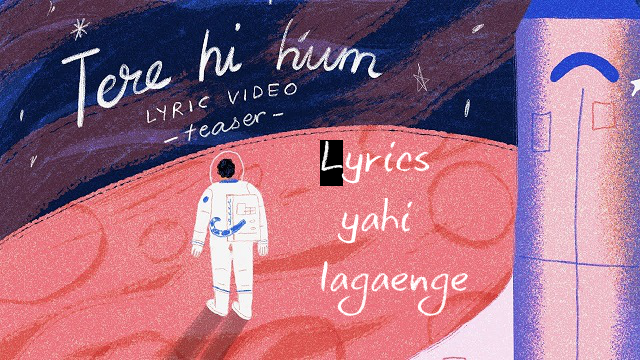

In [103]:
in_img

In [137]:
def draw_alphabets(draw, font_size, gap, font_name, box_scale=1, font_start_gap_scale=0):
  font = ImageFont.truetype(font_name, font_size)
  box_x = 0 
  box_y = 0
  h = font_size
  w = font_size/2
  scaled_h = box_scale*h
  scaled_w = box_scale*w
  for i in range(ord('A'), ord('Z') + 1):
    draw.rectangle(((box_x, box_y), (box_x+scaled_w, box_y+scaled_h)), fill="black")
    text_x = box_x + w*font_start_gap_scale
    text_y = box_y + h*font_start_gap_scale
    draw.text((text_x, text_y), chr(i), font=font)
    box_x = box_x + scaled_w + gap
  box_x = 0 
  box_y = scaled_h+5
  for i in range(ord('a'), ord('z') + 1):
    draw.rectangle(((box_x, box_y), (box_x+scaled_w, box_y+scaled_h)), fill="black")
    text_x = box_x + w*font_start_gap_scale
    text_y = box_y + h*font_start_gap_scale
    draw.text((text_x, text_y), chr(i), font=font)
    box_x = box_x + scaled_w + gap
  return draw

In [156]:
def draw_word(x,y,draw, word, font_size, gap, font_name, box_scale=1, font_start_gap_scale=0):
  font = ImageFont.truetype(font_name, font_size)
  box_x = x 
  box_y = y
  h = font_size
  w = font_size/2
  scaled_h = box_scale*h
  scaled_w = box_scale*w*len(word)
  draw.rectangle(((box_x, box_y), (box_x+scaled_w, box_y+scaled_h)), fill="black")
  text_x = box_x + w*font_start_gap_scale
  text_y = box_y + w*font_start_gap_scale
  draw.text((text_x, text_y), word, font=font)

  return draw


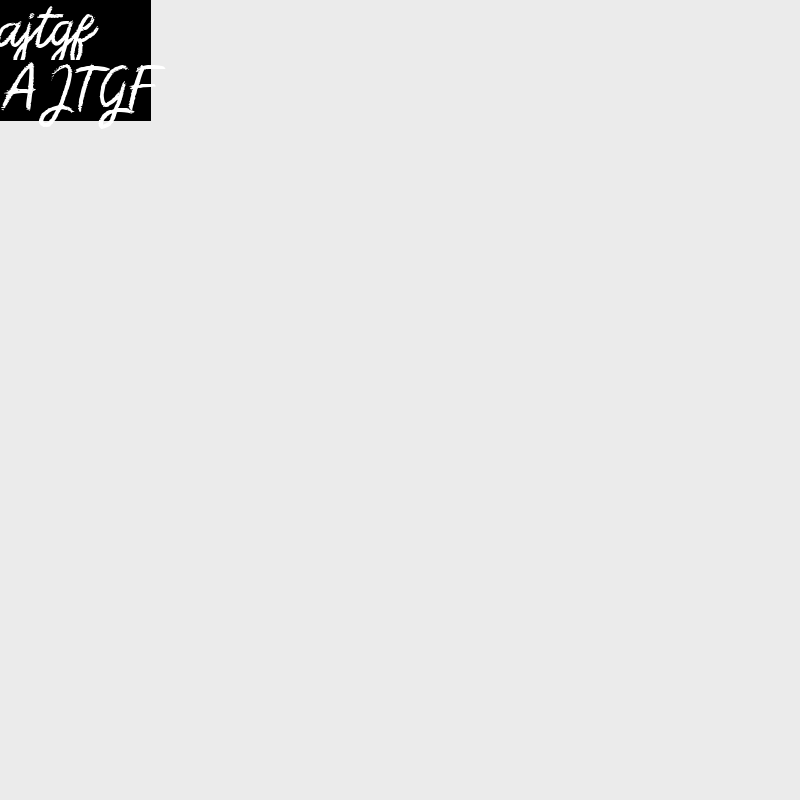

In [158]:
in_img = Image.new("RGB", (800, 800), (235, 235, 235))
draw = ImageDraw.Draw(in_img)
draw_word(0,0, draw,"ajtgf",60,4, "chalk_font1.ttf", box_scale=1,font_start_gap_scale=0.0)
draw_word(0,60, draw,"AJTGF",60,4, "chalk_font1.ttf", box_scale=1,font_start_gap_scale=0.0)
in_img

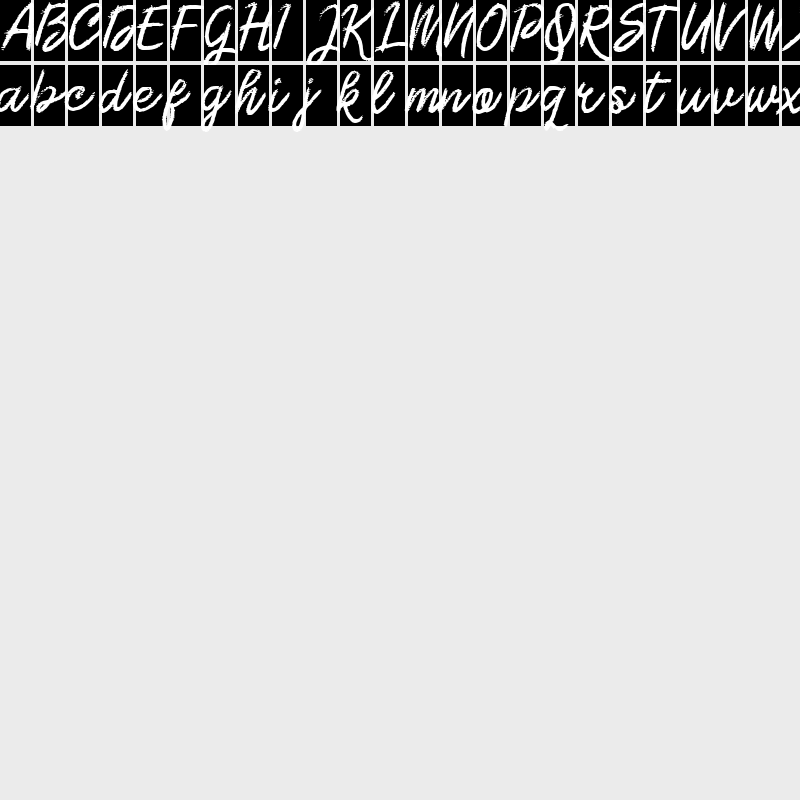

In [144]:
in_img = Image.new("RGB", (800, 800), (235, 235, 235))
draw = ImageDraw.Draw(in_img)
draw_alphabets(draw,60,4, "chalk_font1.ttf", box_scale=1,font_start_gap_scale=0.0)
in_img

In [172]:
import math
math.ceil(7/2)
text = "1 22 333 4444"
i=3
length = len("".join(text.split(" ")[i:i+2]))
print(length)

4


In [415]:
def get_y_and_heights(text_wrapped, dimensions, margin, font):
    """Get the first vertical coordinate at which to draw text and the height of each line of text"""
    # https://stackoverflow.com/a/46220683/9263761
    ascent, descent = font.getmetrics()

    # Calculate the height needed to draw each line of text (including its bottom margin)
    line_heights = [
        font.getmask(text_line).getbbox()[3] + descent + margin
        for text_line in text_wrapped
    ]
    # The last line doesn't have a bottom margin
    line_heights[-1] -= margin

    # Total height needed
    height_text = sum(line_heights)

    # Calculate the Y coordinate at which to draw the first line of text
    y = (dimensions[1] - height_text) // 2

    # Return the first Y coordinate and a list with the height of each line
    return (y, line_heights)

In [ ]:
def draw_text(draw_interface, text,origin_x,origin_y,WIDTH,HEIGHT,):
  # Wrap the `text` string into a list of `CHAR_LIMIT`-character strings
  text_lines = wrap(text, CHAR_LIMIT)
  # Get the first vertical coordinate at which to draw text and the height of each line of text
  y, line_heights = get_y_and_heights(
      text_lines,
      (WIDTH, HEIGHT),
      1,
      font
  )

  # Draw each line of text
  for i, line in enumerate(text_lines):
      # Calculate the horizontally-centered position at which to draw this line
      line_width = font.getmask(line).getbbox()[2]
      x = ((WIDTH - line_width) // 2)

      # Draw this line
      draw_interface.text((x, y), line, font=font, fill=TEXT_COLOR)

      # Move on to the height at which the next line should be drawn at
      y += line_heights[i]

In [421]:
#############################################################################
##### Function to draw text in box
##### Input:
##### pil image
##### box (absolute value x,y,w,h)
##### text
##### font_name
############################################################################
import math
def find_font_size(x,y,w,h, text, pattern):
  max_width = 0 
  num_lines = math.ceil(len(text.split(" "))/pattern)
  for i in range(0,len(text),pattern):
    length = len(" ".join(text.split(" ")[i:i+pattern]))
    if length > max_width:
      max_width = length
  max_width += 2
  font_size_init = int(h/(num_lines+1))
  for size in range(font_size_init, int(font_size_init/4), -1):
    if (size/2)*max_width < w:
      return size

  return False

def draw_text_inside_box(draw, x,y,w,h, text, pattern, font_size, font_name):
  font = ImageFont.truetype(font_name, font_size)
  draw.rectangle(((x, y), (x+w, y+h)), fill="black") #only debug purpose
  text_x = int(x + font_size/2)
  text_y = int(y + font_size/4)
  for i in range(0,len(text),pattern):
    text_line = " ".join(text.split(" ")[i:i+pattern])
    draw.text((text_x, text_y), text_line, font=font)
    text_y = text_y + font_size
  return draw

def draw_text_in_box(image, x,y,w,h, text, font_name):
  pattern = int(w/h) +1
  if pattern < 2:
    pattern = 2
  elif pattern > 5:
    pattern = 5
  font_size = find_font_size(x,y,w,h,text, pattern)
  if font_size:
    draw = ImageDraw.Draw(image)
    draw_text_inside_box(draw,x,y,w,h,text,pattern,font_size,font_name)
  else:
    # find fontsize again with other pattern
    print("Font size could not be found")
    return False

In [422]:
import random

def test_function(num_cases):
  for i in range(num_cases):
    in_img = Image.open("test_input/jaane2.png") 
    ###############################
    # Meaningfull random init of box
    ################################
    x=0.05*in_img.size[0]
    y=0.4*in_img.size[1]
    w=random.randint(200,450)
    h=random.randint(60,200)
    ###############################
    text = "SAPNO MAI ROJ AAYE, AA ZINDAGI MAI AANA SANAM"
    font_list = ["Debby.ttf", "Playlist.otf", "chalk_font1.ttf", "chalk_font2.otf"]
    font_name = "fonts/" + random.choice(font_list)
    #font_name = "fonts/chalk_font3.ttf"
    draw_text_in_box(in_img, x,y,w,h, text, font_name)
    in_img.save("test_output/" + str(i) + ".png")

In [423]:
test_function(10)

In [414]:
################################################
# random code from someone to draw centered text
###################################################
from PIL import Image, ImageDraw, ImageFont
from textwrap import wrap




FONT_FAMILY = "fonts/Debby.ttf"
WIDTH = 400
HEIGHT = 400
FONT_SIZE = 60
V_MARGIN =  10
CHAR_LIMIT = 20
BG_COLOR = "black"
TEXT_COLOR = "white"

text = "Sapne mai roj aaye aa zindagi mai aana sanam"

# Create the font
font = ImageFont.truetype(FONT_FAMILY, FONT_SIZE)
# New image based on the settings defined above
img = Image.new("RGB", (WIDTH, HEIGHT), color=BG_COLOR)
# Interface to draw on the image
draw_interface = ImageDraw.Draw(img)



# Save the resulting image
img.save("result.png")

In [406]:
 i love
 you nikhilas
 dil char
 hai no

 word 8
 pattern 2
 8/2 = 4

 8/2 * 12 = 48 
 50